In [1]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim


import pandas as pd
import matplotlib
from matplotlib import cm
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

c:\users\parth\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
from sklearn.model_selection import train_test_split
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

train_raw = pd.read_csv("train.csv")
#test_data = pd.read_csv("test.csv")
train_data, test_data = train_test_split(train_raw, test_size = 0.33)

train_dup = train_data["is_duplicate"]
test_dup = test_data["is_duplicate"]

print(train_data.dtypes)

id               int64
qid1             int64
qid2             int64
question1       object
question2       object
is_duplicate     int64
dtype: object


In [4]:
def make_tokens(q1,q2):
    tokens_q1= tokenizer.tokenize(q1)
    tokens_q2= tokenizer.tokenize(q2)

    # remove stop words from tokens
    stopped_tokens_q1 = [i for i in tokens_q1 if not i in en_stop]
    stopped_tokens_q2 = [i for i in tokens_q2 if not i in en_stop]

    # stem tokens
    stemmed_tokens_q1 = [p_stemmer.stem(i) for i in stopped_tokens_q1]
    stemmed_tokens_q2 = [p_stemmer.stem(i) for i in stopped_tokens_q2]
    
    return stemmed_tokens_q1, stemmed_tokens_q2

In [6]:
corpus= []
temp1=[]
temp2=[]
for index, row in train_data.iterrows():
    
    #clean up question pairs and tokenize them 
    q1, q2= make_tokens(str(row['question1']).lower(), str(row['question2']).lower())
    temp1.append(q1)
    temp2.append(q2)
    q=q1+q2
    # add tokens to list
    corpus.append(q)

train_data["q1_tokens"]= temp1
train_data["q2_tokens"]= temp2
print(corpus[:30])

[['univers', 'expand', 'expand', 'univers', 'expand'], ['will', 'us', 'perform', 'regim', 'chang', 'philippin', 'restor', 'freedom', 'democraci', 'someon', 'eagerli', 'pursuit', 'freedom', 'want', 'lead', 'chang', 'societi', 'can', 'assum', 'person', 'brainwash', 'freedom', 'democraci'], ['best', 'decis', 'ever', 'made', 'life', 'best', 'decis', 'ever', 'made', 'life'], ['govern', 'abruptli', 'ban', '500', 'rupe', '1000', 'rupe', 'currenc', 'note', 'india', 'think', 'rbi', 's', 'new', 'move', 'ban', '500', '1000', 'note'], ['import', 'indian', 'penal', 'code', 'section', 'everyon', 'know', '161', 'section', 'indian', 'penal', 'code', 'say'], ['time', 'also', 'anoth', 'dimens', 'time', 'dimens'], ['can', 'download', 'snapchat', 'pc', 'rainbow', 'children', 'come'], ['suicid', 'squad', 'movi', 'good', 'opinion', 'review', 'suicid', 'squad', '2016', 'movi'], ['compani', 'work', 'advertis', 'promot', 'flipkart', 'two', 'better', 'amazon', 'flipkart'], ['founder', 'plazmatio', 'founder'], [

c:\users\parth\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\parth\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [7]:
print(train_data.head(30))

            id    qid1    qid2  \
273921  273921    5523  392466   
181559  181559  278106  278107   
115264  115264  187986  187987   
125482  125482   10437   13216   
379333  379333  384859  510836   
235126  235126  345771  345772   
63346    63346  110255  110256   
53436    53436   94471   42711   
333131  333131  460158  460159   
130863  130863  139107  209933   
235761  235761  346537  346538   
313819  313819  438446  438447   
339501  339501  467165  467166   
63531    63531  110550  110551   
108996  108996   21840  110288   
307751  307751  431484  135726   
387181  387181  519485  519486   
24430    24430   45644   45645   
16894    16894    5677   32164   
332326  332326   85042  261971   
32453    32453   59752   59753   
3928      3928    7781    7782   
1289      1289    2570    2571   
216318  216318  221558  322438   
334256  334256   65731  261022   
65855    65855  114233  114234   
12685    12685   24423   24424   
169472  169472  262253  262254   
147597  147597

In [8]:
# turn our tokenized questions into a id <-> term dictionary
dictionary = corpora.Dictionary(corpus)
    
# convert tokenized documents into a document-term matrix
bow = [dictionary.doc2bow(q) for q in corpus]


In [33]:
print(bow[:15])

[[(0, 3), (1, 2)], [(2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)], [(21, 2), (22, 2), (23, 2), (24, 2), (25, 2)], [(26, 2), (27, 2), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 2), (38, 1), (39, 1)], [(40, 1), (41, 2), (42, 1), (43, 1), (44, 2), (45, 1), (46, 2), (47, 1), (48, 2)], [(49, 1), (50, 1), (51, 2), (52, 2)], [(4, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)], [(59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 2), (65, 2)], [(66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1)], [(74, 2), (75, 1)], [(4, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1)], [(90, 1), (91, 3), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1)], [(38, 1), (83, 1), (97, 2), (98, 1), (99, 2)], [(100, 2), (101, 2), (102, 2), (103, 4), (104, 2)

In [51]:
#Creating LDA model
lda = gensim.models.ldamodel.LdaModel(bow, num_topics=50, id2word = dictionary, passes=10)

#print(ldamodel.print_topics(num_topics=10, num_words=3))

In [52]:
print(lda.print_topics(num_topics=25, num_words=10),end= "\n")


[(16, '0.093*"look" + 0.040*"open" + 0.037*"stori" + 0.036*"drive" + 0.033*"list" + 0.032*"got" + 0.026*"recruit" + 0.024*"univers" + 0.023*"new" + 0.022*"contact"'), (5, '0.080*"5" + 0.063*"market" + 0.056*"4" + 0.044*"6" + 0.042*"ve" + 0.038*"7" + 0.037*"8" + 0.032*"stock" + 0.031*"digit" + 0.024*"masturb"'), (12, '0.201*"one" + 0.055*"compar" + 0.040*"water" + 0.036*"averag" + 0.031*"month" + 0.029*"can" + 0.028*"option" + 0.026*"benefit" + 0.023*"graduat" + 0.023*"project"'), (30, '0.082*"state" + 0.045*"date" + 0.044*"unit" + 0.044*"big" + 0.038*"build" + 0.037*"educ" + 0.036*"control" + 0.024*"care" + 0.023*"page" + 0.021*"step"'), (13, '0.210*"differ" + 0.141*"life" + 0.089*"ever" + 0.042*"give" + 0.041*"s" + 0.038*"made" + 0.032*"type" + 0.026*"done" + 0.019*"master" + 0.015*"death"'), (7, '0.105*"job" + 0.054*"video" + 0.051*"human" + 0.040*"right" + 0.037*"interview" + 0.034*"current" + 0.032*"password" + 0.031*"youtub" + 0.030*"process" + 0.027*"now"'), (9, '0.158*"know" + 0

In [53]:
for index, topic in ldamodel.show_topics(formatted=False, num_words= 15):
    print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))

Topic: 27 
Words: ['get', 'can', 'rid', 'age', 'drug', 'job', 'woman', 'center', 'near', 'biggest', 'alcohol', 'internship', '15', 'daili', 'close']
Topic: 36 
Words: ['thing', 'go', 'day', 'know', 'first', 'math', 'bad', 'employe', 'posit', 'attract', 'new', 'one', 'n', 'exactli', 'let']
Topic: 7 
Words: ['creat', 'energi', 'idea', 'current', 'can', 'internet', 'abl', 'profil', 'jee', 'brain', 'season', 'episod', 'screen', 'receiv', 'infinit']
Topic: 35 
Words: ['use', 'indian', 'old', 'can', 'year', 'control', 'instead', 'canada', 'forc', '12', 'gold', 'armi', 'replac', 'opportun', 'olymp']
Topic: 26 
Words: ['video', 'cours', 'gener', 'appli', 'youtub', 'can', 'alway', 'digit', 'valu', 'calcul', 'side', 'visa', 'market', 'imag', 'other']
Topic: 43 
Words: ['live', 'anyon', 'move', 'never', 'battl', 'public', 'given', 'signific', 'beauti', 'full', 'object', 'treat', 'enough', 'decid', 'toward']
Topic: 30 
Words: ['compani', 'countri', 'increas', 'product', 'manag', 'can', 'cultur', '

In [ ]:
#cleaning test data
temp1=[]
temp2=[]
for index, row in test_data.iterrows():
    
    #clean up question pairs and tokenize them 
    q1, q2= make_tokens(str(row['question1']).lower(), str(row['question2']).lower())
    temp1.append(q1)
    temp2.append(q2)

test_data["q1_tokens"]= temp1
test_data["q2_tokens"]= temp2
print(test_data.head(30))

In [55]:
question1_vec = [dictionary.doc2bow(text) for text in test_data.q1_tokens.tolist()]
question2_vec = [dictionary.doc2bow(text) for text in test_data.q2_tokens.tolist()]

In [56]:
lda_q1= lda[question1_vec]
lda_q2= lda[question2_vec]

In [57]:
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.metrics.pairwise import manhattan_distances as md

cosine_sim = []
manhattan_dist = []
for i,j in zip(lda_q1, lda_q2):
    
    sim = cs(i,j)
    cosine_sim.append(sim[0][0])
    
    sim = md(i,j)
    manhattan_dist.append(sim[0][0])

test_data["cosine_sim"] = cosine_sim
test_data["manhattan_dist"]= manhattan_dist


c:\users\parth\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\parth\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [39]:
print(test_data.head(15))

            id    qid1    qid2  \
392740  392740  356074  525455   
311070  311070  435289  435290   
79083    79083  134730  134731   
74107    74107     608   26710   
265216  265216  382144  382145   
400748  400748  534100  534101   
55102    55102   50634   97178   
48529    48529   86507   86508   
86102    86102  145252   58502   
79235    79235  115169  134953   
373945  373945   84390  220176   
203213  203213  269640   40434   
236647  236647  299053  152085   
68166    68166  117850  104086   
352792  352792    7529   60274   

                                                question1  \
392740        Which business can I start with five lakhs?   
311070  How can the education system in India be impro...   
79083   How effective is Krav Maga for self-defense as...   
74107       Which are the best Hollywood thriller movies?   
265216             Why don't bikes have a gear indicator?   
400748                       What is best adventure list?   
55102   Is there any way I c

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

result_cos= []
result_man= []
for index, row in test_data.iterrows():
    if row["cosine_sim"] >= 0.999999:
        result_cos.append(1)
    else:
        result_cos.append(0)
        
    if row["manhattan_dist"] <= 0.0001:
        result_man.append(1)
    else:
        result_man.append(0)
        
print("Cosine similarity accuracy: ", accuracy_score(test_data["is_duplicate"], result_cos)*100)
print()
print("Confusion Matrix:")
print(confusion_matrix(test_data["is_duplicate"], result_cos))
print()
print("Classification Report:")
print(classification_report(test_data["is_duplicate"], result_cos))
print()

print("Manhattan distance accuracy: ", accuracy_score(test_data["is_duplicate"], result_man)*100)
print()
print("Confusion Matrix:")
print(confusion_matrix(test_data["is_duplicate"], result_man))
print()
print("Classification Report:")
print(classification_report(test_data["is_duplicate"], result_man))

Cosine similarity accuracy:  62.553966540744746

Confusion Matrix:
[[69331 14525]
 [35434 14126]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.83      0.74     83856
           1       0.49      0.29      0.36     49560

   micro avg       0.63      0.63      0.63    133416
   macro avg       0.58      0.56      0.55    133416
weighted avg       0.60      0.63      0.60    133416


Manhattan distance accuracy:  64.19394975115429

Confusion Matrix:
[[76518  7338]
 [40433  9127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76     83856
           1       0.55      0.18      0.28     49560

   micro avg       0.64      0.64      0.64    133416
   macro avg       0.60      0.55      0.52    133416
weighted avg       0.62      0.64      0.58    133416



In [71]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda.show_topic(i,50)) for i in range(50)}
#data_lda
#import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)
df_lda

(2341, 50)
(50, 2341)


,0,000,1,10,100,1000,10th,11,11th,12,...,year,yellow,yet,york,young,youtub,z,zealand,zero,zone
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.049101,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.029563,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.000000,0.00000,0.000000,0.015967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
6,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
7,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.031077,0.000000,0.000000,0.005656,0.00000
8,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,0.000000,0.00000,0.000000,0.000000,0.020161,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


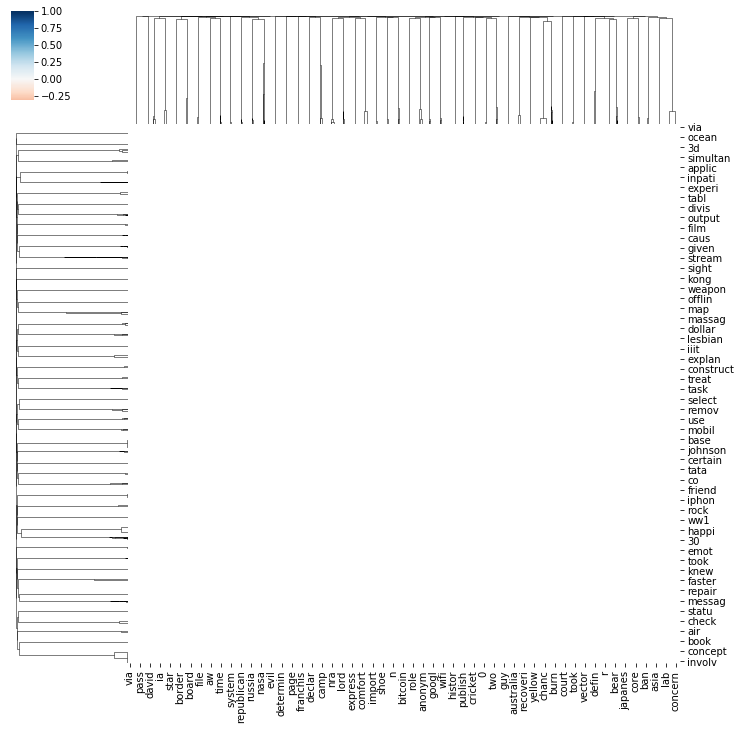

In [79]:
import seaborn as sns
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [81]:
tfidf = models.TfidfModel(bow)

corpus_tfidf = tfidf[bow]

corpus_lda = lda[corpus_tfidf]

In [83]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

c:\users\parth\appdata\local\programs\python\python36\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=               x           y  topics  cluster      Freq
topic                                                  
29     38.900688  -31.236044       1        1  9.583440
3      11.457314  -51.916950       2        1  6.855310
17      6.218740   33.196289       3        1  4.907791
15     31.844650    8.733994       4        1  4.537294
13     47.770149   13.628066       5        1  3.927831
41     10.765922  -31.245506       6        1  2.831099
6     -63.012886   55.923462       7        1  2.501398
23     53.211155   59.532864       8        1  2.479930
48     41.094318   37.457375       9        1  2.415239
39    -36.003986   30.612034      10        1  2.287813
19     -6.315920   46.931206      11        1  2.095462
11    -36.650780   16.137486      12        1  2.073665
4     -20.710546   18.837439      13        1  2.071795
32      2.206865    1.599282      14        1  2.042362
36    -42.276302  -39.626350      15        1  2.008102
10    -10.686727   25.083691      16        1  1.979334
9      73.694687   27.336079      17        1  1.978517
47     36.808506  105.055954      18        1  1.935157
49     56.996876  -10.471220      19        1  1.933614
33      0.344568   18.603416      20        1  1.932559
43    -65.729958    7.164466      21        1  1.912176
37     30.368355  -42.982887      22        1  1.883915
45     20.149921   -6.326036      23        1  1.829666
2     -58.668201  -19.394196      24        1  1.694150
27     30.284060  -71.987640      25        1  1.556414
26    -17.006327  -20.040300      26        1  1.200897
16    -48.862225   44.864281      27        1  1.160139
44     58.827797   38.914059      28        1  1.148772
46    -23.359512   -5.787819      29        1  1.147233
0      -9.472283    5.607963      30        1  1.147227
25     -3.746657  -16.634750      31        1  1.147140
38     -5.965158  -32.343994      32        1  1.147139
20      6.687323  -13.051710      33        1  1.147079
8      22.341728   27.239069      34        1  1.147079
1      -9.758058  -53.388020      35        1  1.147079
42    -46.224838  123.490387      36        1  1.147079
40    -25.156557   42.552589      37        1  1.147079
5      30.785759   83.741501      38        1  1.147079
35    -22.562880  -36.365776      39        1  1.147079
7      58.440464  -46.774029      40        1  1.147079
34    -71.902054   37.560982      41        1  1.147079
18     -2.115134   70.489876      42        1  1.147079
31     12.375414   12.184537      43        1  1.147079
30    -28.637480   68.961975      44        1  1.147079
12    -41.846455   -3.865717      45        1  1.147079
28     18.409227   52.121990      46        1  1.147079
14    -32.418941  -62.841579      47        1  1.147079
22    -33.703339  -20.040762      48        1  1.147079
21     -7.150469   -4.763543      49        1  1.147079
24     28.916023  -10.909932      50        1  1.147079, topic_info=     Category         Freq       Term        Total  loglift  logprob
term                                                                
20    Default  3628.000000       will  3628.000000  30.0000  30.0000
21    Default  1476.000000       best  1476.000000  29.0000  29.0000
277   Default  2178.000000       make  2178.000000  28.0000  28.0000
151   Default  1653.000000     differ  1653.000000  27.0000  27.0000
32    Default  1067.000000      india  1067.000000  26.0000  26.0000
193   Default   945.000000        use   945.000000  25.0000  25.0000
255   Default  1576.000000      trump  1576.000000  24.0000  24.0000
375   Default  1365.000000      money  1365.000000  23.0000  23.0000
24    Default  1109.000000       life  1109.000000  22.0000  22.0000
4     Default  4067.000000        can  4067.000000  21.0000  21.0000
178   Default   712.000000        get   712.000000  20.0000  20.0000
604   Default   812.000000          t   812.000000  19.0000  19.0000
278   Default   855.000000      peopl   855.000000  18.0000  18.0000
59    Defa

In [ ]:
# get the topic contributions for the document chosen at random above
doc_distribution = np.array([[tup[1] for tup in lst] for lst in lda[bow]])
# bar plot of topic distribution for this document
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
patches = ax.bar(np.arange(len(doc_distribution)), doc_distribution)
ax.set_xlabel('Topic ID', fontsize=15)
ax.set_ylabel('Topic Contribution', fontsize=15)
ax.set_title("Topic Distribution for Article " + str(random_article_index), fontsize=20)
ax.set_xticks(np.linspace(10,100,10))
fig.tight_layout()
plt.show()

In [ ]:
figure
for topicIdx in range(1,20):
    subplot(2,2,topicIdx)
    wordcloud(mdl,topicIdx);
    title("Topic: " + topicIdx)
end

In [ ]:
import tom_lib
from tom_lib.visualization import visualization
from tom_lib.nlp.topic_model import LatentDirichletAllocation,\
    NonNegativeMatrixFactorization
from tom_lib.visualization.visualization import Visualization
from tom_lib.structure.corpus import Corpus
import lda

#from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

In [14]:
id_no = 0
tom_array = []

for item in corpus:
    tom_dict = {"id":None, "title": None, "text":None}
    tom_dict['id'] = id_no
    tom_dict['title'] = "q" + str(id_no)
    tom_dict['text'] = ' '.join(item)
    tom_array.append(tom_dict)
    id_no+=1 
tom_df = pd.DataFrame(tom_array)
tom_df = tom_df[['id','title','text']]
print(tom_df.head(30))

    id title                                               text
0    0    q0  step step guid invest share market india step ...
1    1    q1  stori kohinoor koh noor diamond happen indian ...
2    2    q2  can increas speed internet connect use vpn can...
3    3    q3  mental lone can solv find remaind math 23 24 m...
4    4    q4  one dissolv water quikli sugar salt methan car...
5    5    q5  astrolog capricorn sun cap moon cap rise say m...
6    6    q6  buy tiago keep childern activ far phone video ...
7    7    q7                 can good geologist great geologist
8    8    q8                        use シ instead し use instead
9    9    q9  motorola compani can hack charter motorolla dc...
10  10   q10  method find separ slit use fresnel biprism thi...
11  11   q11    read find youtub comment can see youtub comment
12  12   q12  can make physic easi learn can make physic eas...
13  13   q13       first sexual experi like first sexual experi
14  14   q14  law chang statu student vi

In [ ]:
topic_model = LatentDirichletAllocation(corpus)
topic_model.infer_topics(num_topics=15, algorithm='variational')

In [ ]:
#using tom_lib to infer optimal number of topics
#copy_corpus= corpus.copy()
tom_df.to_csv('tom_df.csv', sep='\t', index=False, encoding='utf-8')
tomlib_corpus = Corpus(source_file_path='tom_df.csv',
                language='english',
                vectorization='tfidf',
                n_gram=1,
                max_relative_frequency=0.8,
                min_absolute_frequency=2)
print('corpus size:', corpus.size)
print('vocabulary size:', len(corpus.vocabulary))
print('Vector representation of document 0:\n', corpus.vector_for_document(0))
